# Regression Task


## 1. Explanatory Data Analysis(EDA)

In [1]:
#Global Modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Machine Learning Modules
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from tensorflow import keras
from keras.layers import Dense
from keras.models import Sequential

#Setting up
sns.set(palette="coolwarm")

In [2]:
#importing the datasets "kc_house_data"
data = pd.read_csv('kc_house_data.csv')
#Displaying the first 5 rows
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,condition
0,221900.0,3,1.00,1180,5650,1.0,7,1180,0,1955,0,47.5112,-122.257,1340,5650,3
1,538000.0,3,2.25,2570,7242,2.0,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,3
2,180000.0,2,1.00,770,10000,1.0,6,770,0,1933,0,47.7379,-122.233,2720,8062,3
3,604000.0,4,3.00,1960,5000,1.0,7,1050,910,1965,0,47.5208,-122.393,1360,5000,5
4,510000.0,3,2.00,1680,8080,1.0,8,1680,0,1987,0,47.6168,-122.045,1800,7503,3


In [3]:
print("Shape: ", data.shape) # 21613 data points and 16 features
data.describe()

Shape:  (21613, 16)


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,condition
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.401822e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,7.656873,1788.390691,291.509045,1971.005136,84.402258,47.560053,-122.213896,1986.552492,12768.455652,3.409430
std,3.673622e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,1.175459,828.090978,442.575043,29.373411,401.679240,0.138564,0.140828,685.391304,27304.179631,0.650743
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,47.155900,-122.519000,399.000000,651.000000,1.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,47.471000,-122.328000,1490.000000,5100.000000,3.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,7.000000,1560.000000,0.000000,1975.000000,0.000000,47.571800,-122.230000,1840.000000,7620.000000,3.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,47.678000,-122.125000,2360.000000,10083.000000,4.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,47.777600,-121.315000,6210.000000,871200.000000,5.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   grade          21613 non-null  int64  
 7   sqft_above     21613 non-null  int64  
 8   sqft_basement  21613 non-null  int64  
 9   yr_built       21613 non-null  int64  
 10  yr_renovated   21613 non-null  int64  
 11  lat            21613 non-null  float64
 12  long           21613 non-null  float64
 13  sqft_living15  21613 non-null  int64  
 14  sqft_lot15     21613 non-null  int64  
 15  condition      21613 non-null  int64  
dtypes: float64(5), int64(11)
memory usage: 2.6 MB


From the display there is no null value in our different features.

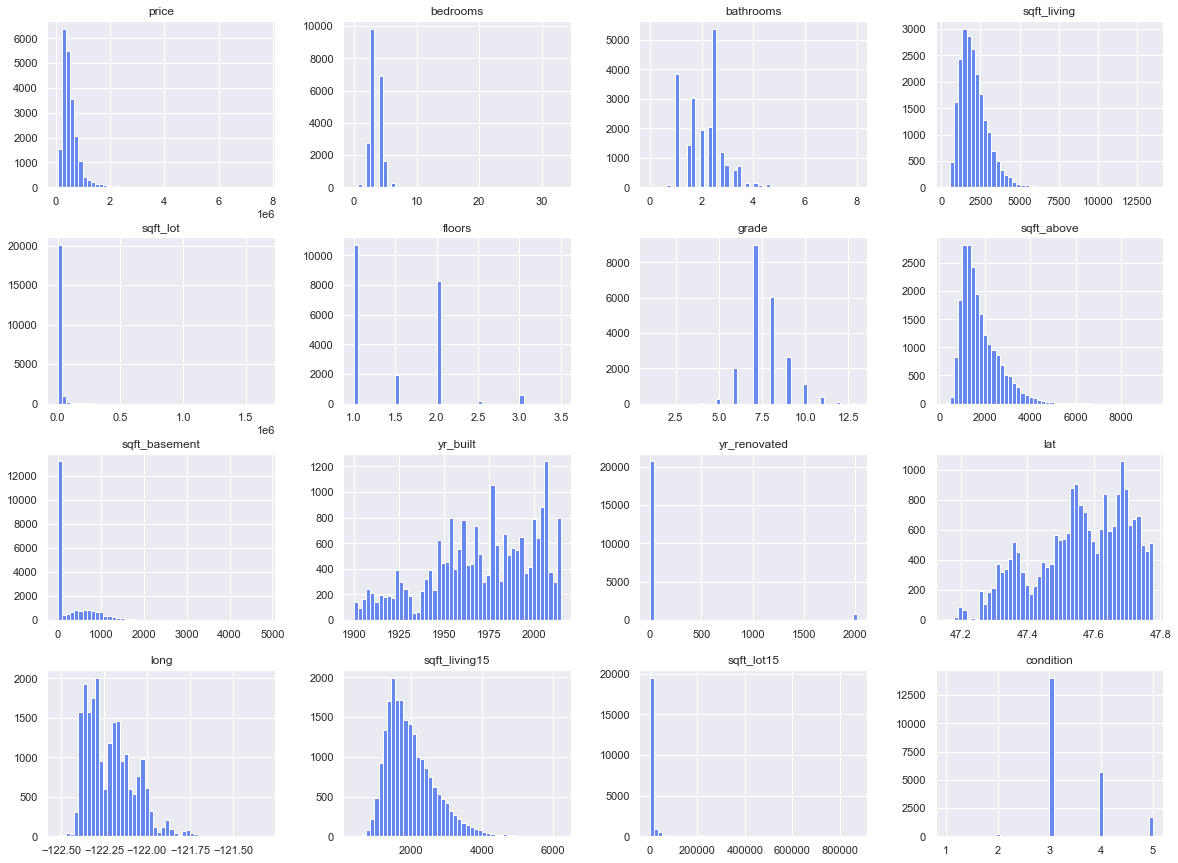

In [5]:
#Distribution Plot of each feature
data.hist(figsize=(20, 15), bins=50)
plt.show()

We can see that some feature are skewed, applying the <code>log</code> function 
to them should slight it, giving us a more bell shaped distribution


In [6]:
#Boxplot
def univariate_plot(data, figsize, index):
    n_rows, n_cols = index
    plt.figure(figsize=figsize)
    for idx, var in enumerate(data.columns, 1):
        plt.subplot(n_rows, n_cols, idx)
        sns.boxplot(x = data[var])


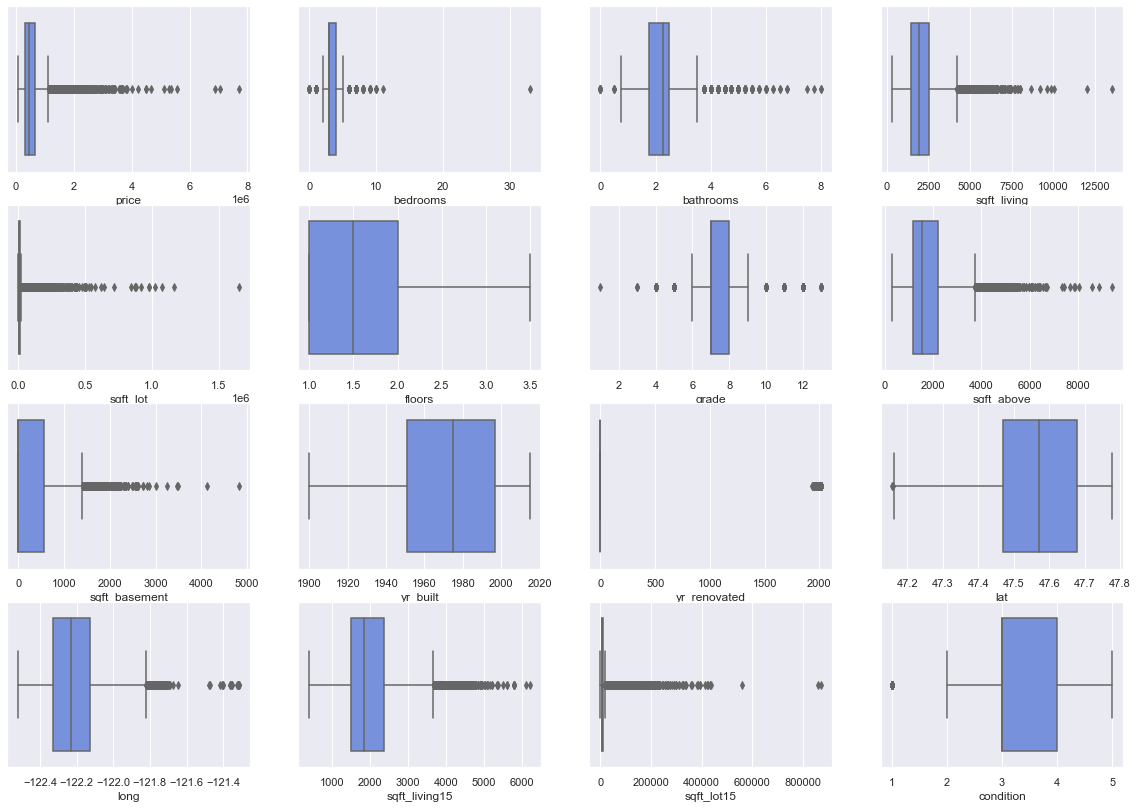

In [7]:
univariate_plot(data, figsize=(20, 14), index=(4,4))

There are outliers, we need to take care of them

In [8]:
#Removing outliers beyond the interquatile with an offset of 1.5
def remove_outliers(data, columns):
    ans = data.copy()
    for var in columns:
        desc = ans[var].describe()        
        iq_range = desc['75%'] - desc['25%']
        intv_range = (desc['25%'] - 1.5 * iq_range, desc['75%'] + 1.5 * iq_range)
        ans = ans[ans[var].between(*intv_range)]
    return ans

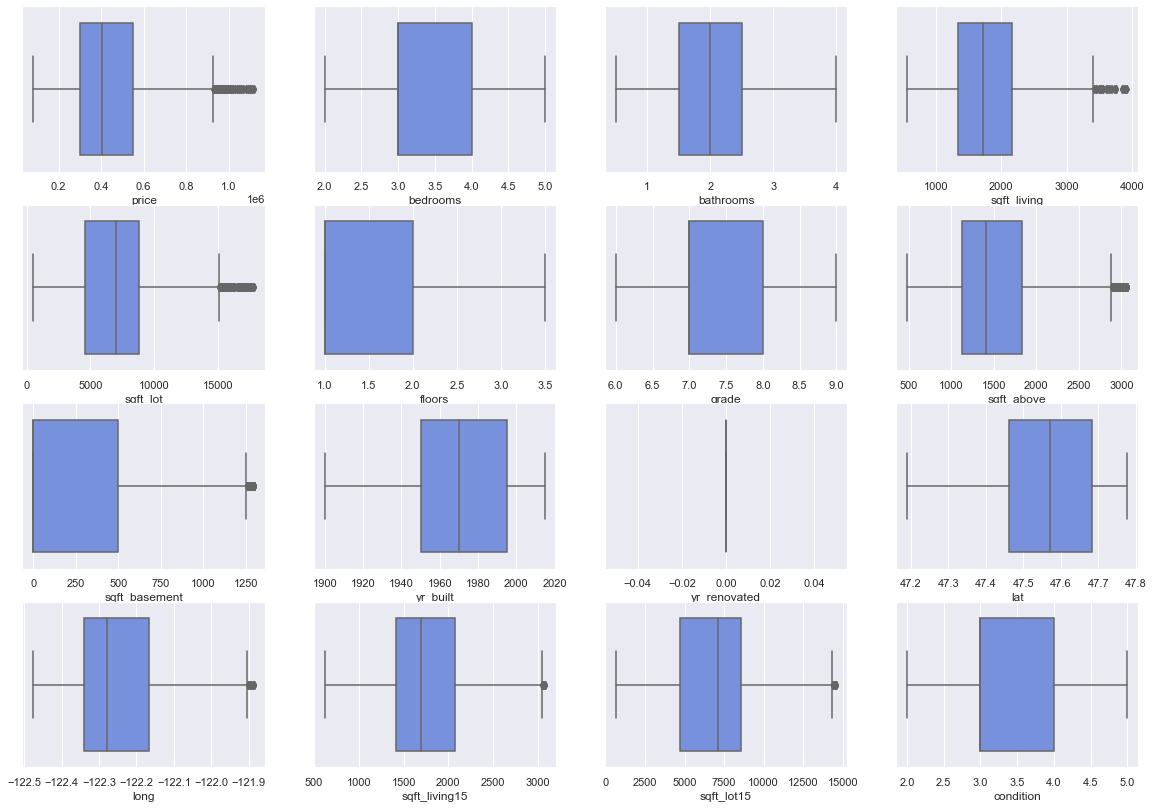

In [9]:
new_data = remove_outliers(data, data.columns)
univariate_plot(new_data, figsize=(20, 14), index=(4,4))

Now things look better

In [10]:
#Applying log to the the price 
new_data['price'] = np.log(new_data['price'])

In [11]:
#updating the yr_renovated because there is a lot of 0 value
new_data['yr_renovated'] = new_data[['yr_renovated', 'yr_built']].apply(lambda x: x[0] if x[0] else x[1], axis=1)

In [12]:
#Splitting the data into a training and test set
train_set, test_set = train_test_split(new_data, test_size=0.2, random_state=42)
#Training set
X_train = train_set.drop('price', axis=1)
y_train = train_set['price'].copy()
#Test set (20% of the dataset)
X_test = test_set.drop('price', axis=1)
y_test = test_set['price'].copy()

## 2. Create regression models using Decision Tree, Random Forest & Neural Networks algorithm

In [13]:
#Return a given model prediction upon X
def predict(model, X):
    return model.predict(X)

#Calculation the root mean squared error
def rmse(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

#Return a given model score (r2_score for regression algorithms)
def score(model, X, y):
    return model.score(X, y)

#restoring normal value of output y 
def y_value(y):
    return np.power(np.exp(1), y)

In [14]:
#Helper function that dislpay how well the model fit the data
def display_model_fitting(y_train, y_train_pred, y_test, y_test_pred, xlabel="Price", ylabel="Predicted Price"):
    plt.figure(figsize=(16, 8))
    plt.subplot(1, 2, 1)
    plt.scatter(
        x=y_train, 
        y=y_train_pred, 
        alpha=0.3, 
        edgecolor=None
    )
    plt.plot(
        [y_train.min(), y_train.max()],
        [y_train.min(), y_train.max()],
        color='red', 
        linestyle='dashed', 
        label=f'train set, R²: {r2_score(y_train, y_train_pred):.3}'
    )
    plt.legend()
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)


    plt.subplot(1, 2, 2)
    plt.scatter(
        x=y_test, 
        y=y_test_pred, 
        alpha=0.3, 
        edgecolor=None
    )
    plt.plot(
        [y_test.min(), y_test.max()],
        [y_test.min(), y_test.max()],
        color='red', 
        linestyle='dashed', 
        label=f'test set, R²: {r2_score(y_test, y_test_pred):.3}'
    )
    plt.legend()
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)


In [15]:
#Standarizing the input features
scaler = StandardScaler()

#Applying the scaler
X_train_prep = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_prep = pd.DataFrame(scaler.fit_transform(X_test), columns=X_test.columns)

###  A. Decision Tree Regressor
https://en.wikipedia.org/wiki/Decision_tree_learning>

In [16]:
#using the Decision Tree Regressor from scikit-learn
tree_reg = DecisionTreeRegressor()

#Fitting the model to data
tree_model = tree_reg.fit(X_train_prep, y_train)

In [17]:
print("Prediction Train: ", score(tree_reg, X_train_prep, y_train))
print("Prediction Test: ", score(tree_reg, X_test_prep, y_test))

Prediction Train:  0.9950908372862532
Prediction Test:  0.6692472817830084


### B. Random Forest Regressor
https://wikipedia.org/wiki/Random_forest

In [18]:
rf_reg = RandomForestRegressor()
rf_model = rf_reg.fit(X_train_prep, y_train)

In [19]:
print("Prediction Train: ", score(rf_reg, X_train_prep, y_train))
print("Prediction Test: ", score(rf_reg, X_test_prep, y_test))

Prediction Train:  0.9758598530197715
Prediction Test:  0.8448610030481685


### C. Neural Networks

In [20]:
n_layers = 7 #number of layer
n_units = X_train.shape[1] #number of units in each layer

model = Sequential() 
#Using Relu activation in each unit
for i in range(n_layers) :
    model.add(Dense(n_units, activation="relu"))

#Output layer, with one unit using linear activation
model.add(Dense(1))

#using mean_squared_error as our loss funtion, and adam as our optimizer
model.compile(loss="mse", optimizer="adam")

In [21]:
#Training the model for 500 epochs 
history = model.fit(X_train_prep, y_train, epochs=500 , batch_size=100, validation_data=(X_test_prep, y_test), verbose=False)

In [22]:
#Predictions
y_train_pred = model.predict(X_train_prep)
y_test_pred = model.predict(X_test_prep)

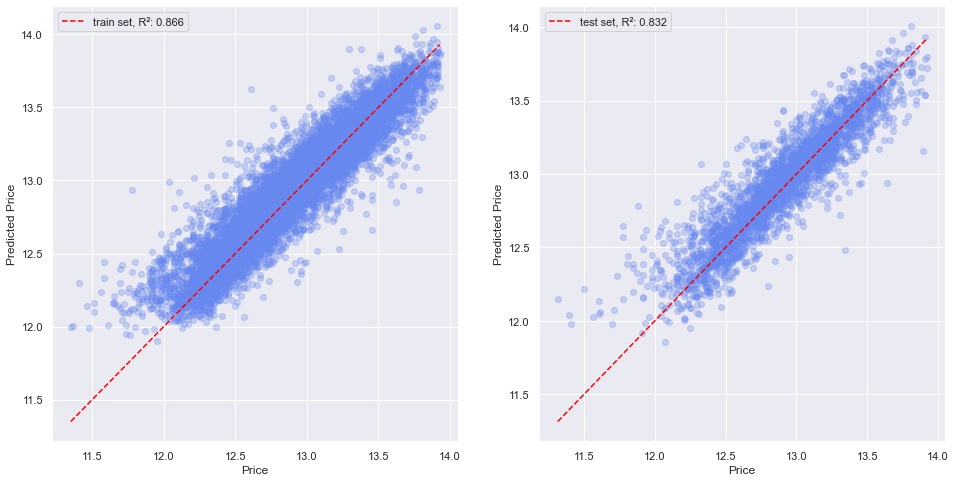

In [23]:
#log(price)
display_model_fitting(y_train, y_train_pred, y_test, y_test_pred) 

The model is doing a pretty decent job